In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import graphviz

In [11]:
from sklearn.tree import export_graphviz
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize.regexp import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from collections import Counter
from konlpy.tag import Okt; t = Okt()
from nltk.tokenize import TweetTokenizer
from PIL import Image

In [12]:
data = open("gangseo_petition.text").read()
data

',no.,title,status\n0,214244,다수의 포트홀 발생,접수\n1,214215,수명산파크1단지삼거리 옆 부지 도서관 건설 지연 문제,접수\n2,214190,화곡1동 전기차 충전 시설 미비,접수\n3,214110,1인가구 재택치료 방치,"처리중\n(2022-03-07 13:01:00)"\n4,214097,격리통지서 발급_코로나 확진,"처리중\n(2022-03-07 11:54:00)"\n5,214063,격리통지서 좀 보내주세요,"처리중\n(2022-03-07 09:14:00)"\n6,213984,"양성 안내 후 조치 방법, 재택, 치료에 대한 안내가 없음","처리중\n(2022-03-04 17:44:00)"\n7,213981,격리해제서 요청요,"처리중\n(2022-03-04 17:16:00)"\n8,213977,격리해제서 발급요,"처리중\n(2022-03-04 17:10:00)"\n9,213953,격리통지서 미발급 이유가 뭔가요??,"처리중\n(2022-03-04 13:38:00)"\n10,213790,염창동 106-1 도로 정비요청,"처리중\n(2022-03-03 14:41:00)"\n11,213712,코로나 확진 격리통지서,"처리중\n(2022-03-02 18:00:00)"\n12,213620,양성 판정 후 격리해제 통보안내서,답변완료\n13,213614,명지새동네길 소상공인입니다.,이송이첩\n14,213589,코로나검사결과,답변완료\n15,213577,마곡8구역 공영주차장 임시선별검사소 PCR 검사 인력 늘려주세요,답변완료\n16,213476,강서구 열병합 발전소,이송이첩\n17,213466,코로나 양성판정후 행동요령,"처리중\n(2022-02-28 13:54:00)"\n18,213413,코로나 격리가 끝나가는데 관련 전화나 연락을 받은게 없네요,답변완료\n19,213251,강서보건소 코로나상황실 상담원의 무성의함과 무지함에대해 교육바랍니다.,"처리중\n(2022-03-07 18:00:00)"\n20,213207,강서구 보건소 전화연결 불친절

In [13]:
content_text = ''

for each_line in data[:2000]:
    content_text = content_text + each_line + '\n'

In [14]:
def tokenizer_konlpy(text):
    okt=Okt()  
    return [word for word in okt.nouns(text)] 
noun_token = tokenizer_konlpy(data)
print(noun_token)

['다수', '포트홀', '발생', '접수', '명산', '파크', '단지', '삼거리', '옆', '부지', '도서관', '건설', '지연', '문제', '접수', '화곡', '전기차', '충전', '시설', '미비', '접수', '인', '가구', '재택', '치료', '방치', '처리', '격리', '통지서', '발급', '코로나', '확진', '처리', '격리', '통지서', '좀', '처리', '양성', '안내', '후', '조치', '방법', '재택', '치료', '대한', '안내', '처리', '격리', '해제', '요청', '처리', '격리', '해제', '발급', '처리', '격리', '통지서', '발급', '이유', '뭔가', '처리', '염창동', '도로', '정비', '요청', '처리', '코로나', '확진', '격리', '통지서', '처리', '양성', '판정', '후', '격리', '해제', '통보', '안내서', '답변', '완료', '명', '길', '상공', '이송', '이첩', '코로나', '검사', '결과', '답변', '완료', '마곡', '구역', '공영', '주차장', '임', '시선', '검사', '소', '검사', '인력', '답변', '완료', '강서구', '병합', '발전소', '이송', '이첩', '코로나', '양성', '판정', '후', '행동', '요령', '처리', '코로나', '격리', '관련', '전화', '연락', '답변', '완료', '강서', '보건소', '코로나', '황실', '상담', '무성의', '함', '대해', '교육', '처리', '강서구', '보건소', '전화', '연결', '불친절', '함', '대해', '문의', '처리', '불법', '정차', '단속', '관련', '문의', '답변', '완료', '마을', '버스', '노선', '추가', '관련', '문의', '답변', '완료', '격리', '기간', '이후', '코로나', '위중', '증', '환자', '입원', '치료', '지원

In [15]:
ko = nltk.Text(noun_token)   
print(len(noun_token))          # 토큰 전체 갯수
print(len(set(noun_token)))     # 토큰 unique 갯수

14072
2400


In [16]:
ko = nltk.Text(noun_token)
ko.vocab().most_common(100)

[('답변', 1485),
 ('완료', 1474),
 ('이송', 256),
 ('이첩', 256),
 ('요청', 252),
 ('공사', 144),
 ('소음', 139),
 ('공원', 139),
 ('설치', 136),
 ('관련', 125),
 ('민원', 112),
 ('및', 108),
 ('강서', 106),
 ('코로나', 104),
 ('앞', 104),
 ('강서구', 101),
 ('도로', 96),
 ('길', 78),
 ('건', 76),
 ('문의', 70),
 ('주차', 59),
 ('불법', 58),
 ('센터', 56),
 ('처리', 55),
 ('신고', 54),
 ('린', 51),
 ('격리', 50),
 ('아파트', 50),
 ('번', 50),
 ('단속', 49),
 ('개선', 47),
 ('쓰레기', 42),
 ('버스', 41),
 ('관리', 41),
 ('주민', 41),
 ('문제', 40),
 ('대한', 38),
 ('구청', 38),
 ('차량', 38),
 ('현장', 38),
 ('좀', 36),
 ('마곡', 36),
 ('사거리', 36),
 ('출구', 36),
 ('시설', 35),
 ('검사', 35),
 ('방화', 35),
 ('흡연', 35),
 ('화곡', 34),
 ('확', 34),
 ('폐기물', 34),
 ('옆', 33),
 ('보건소', 33),
 ('진자', 33),
 ('가로등', 33),
 ('피해', 32),
 ('구역', 31),
 ('주변', 31),
 ('신호등', 29),
 ('사장', 29),
 ('건물', 29),
 ('철거', 28),
 ('인도', 28),
 ('어린이', 28),
 ('단지', 27),
 ('관', 27),
 ('대형', 27),
 ('등촌', 26),
 ('신청', 26),
 ('후', 25),
 ('조치', 25),
 ('자전거', 25),
 ('주택', 25),
 ('자가', 25),
 ('오피스텔', 25),
 ('가양

In [26]:
stop_words = ['강서', '답변', '완료', '및', '이첩', '요청', '관련', '민원', '앞', '강서구', '건', '문의', '린', '번', '대한', '좀',
             '확', '옆', '진자', '관', '후', '이송']

tokens_ko = [each_word for each_word in noun_token
             if each_word not in stop_words]

ko = nltk.Text(tokens_ko)
ko.vocab().most_common(50)

[('공사', 144),
 ('소음', 139),
 ('공원', 139),
 ('설치', 136),
 ('코로나', 104),
 ('도로', 96),
 ('길', 78),
 ('주차', 59),
 ('불법', 58),
 ('센터', 56),
 ('처리', 55),
 ('신고', 54),
 ('격리', 50),
 ('아파트', 50),
 ('단속', 49),
 ('개선', 47),
 ('쓰레기', 42),
 ('버스', 41),
 ('관리', 41),
 ('주민', 41),
 ('문제', 40),
 ('구청', 38),
 ('차량', 38),
 ('현장', 38),
 ('마곡', 36),
 ('사거리', 36),
 ('출구', 36),
 ('시설', 35),
 ('검사', 35),
 ('방화', 35),
 ('흡연', 35),
 ('화곡', 34),
 ('폐기물', 34),
 ('보건소', 33),
 ('가로등', 33),
 ('피해', 32),
 ('구역', 31),
 ('주변', 31),
 ('신호등', 29),
 ('사장', 29),
 ('건물', 29),
 ('철거', 28),
 ('인도', 28),
 ('어린이', 28),
 ('단지', 27),
 ('대형', 27),
 ('등촌', 26),
 ('신청', 26),
 ('조치', 25),
 ('자전거', 25)]

In [27]:
# matplotlib 그래프 한글폰트 깨질 때 대처(Mac & Window)
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/HMFMMUEX.ttc").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

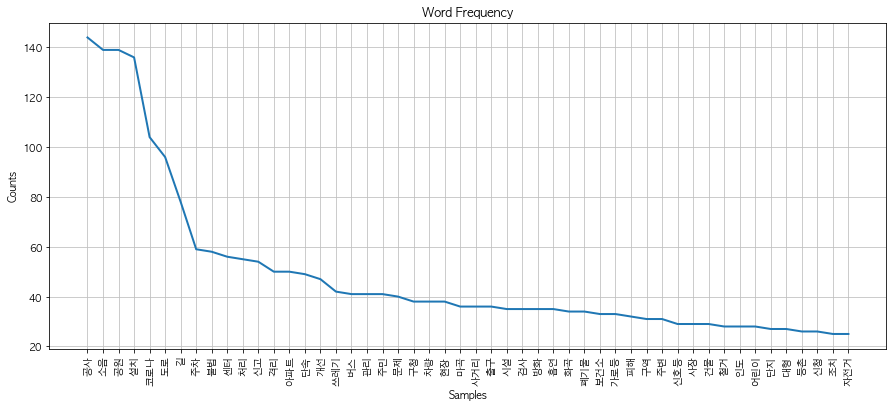

In [28]:
plt.figure(figsize=(15,6))

plt.title("Word Frequency")

ko.plot(50) 
plt.show()

In [29]:
word_data = ko.vocab().most_common(300)
word_data

[('공사', 144),
 ('소음', 139),
 ('공원', 139),
 ('설치', 136),
 ('코로나', 104),
 ('도로', 96),
 ('길', 78),
 ('주차', 59),
 ('불법', 58),
 ('센터', 56),
 ('처리', 55),
 ('신고', 54),
 ('격리', 50),
 ('아파트', 50),
 ('단속', 49),
 ('개선', 47),
 ('쓰레기', 42),
 ('버스', 41),
 ('관리', 41),
 ('주민', 41),
 ('문제', 40),
 ('구청', 38),
 ('차량', 38),
 ('현장', 38),
 ('마곡', 36),
 ('사거리', 36),
 ('출구', 36),
 ('시설', 35),
 ('검사', 35),
 ('방화', 35),
 ('흡연', 35),
 ('화곡', 34),
 ('폐기물', 34),
 ('보건소', 33),
 ('가로등', 33),
 ('피해', 32),
 ('구역', 31),
 ('주변', 31),
 ('신호등', 29),
 ('사장', 29),
 ('건물', 29),
 ('철거', 28),
 ('인도', 28),
 ('어린이', 28),
 ('단지', 27),
 ('대형', 27),
 ('등촌', 26),
 ('신청', 26),
 ('조치', 25),
 ('자전거', 25),
 ('주택', 25),
 ('자가', 25),
 ('오피스텔', 25),
 ('가양', 25),
 ('냄새', 25),
 ('무단', 24),
 ('봉제산', 23),
 ('때문', 23),
 ('인근', 23),
 ('건의', 23),
 ('까치산', 23),
 ('염창동', 22),
 ('정비', 22),
 ('마을', 22),
 ('방화동', 22),
 ('투기', 22),
 ('우장산', 22),
 ('등', 22),
 ('놀이터', 22),
 ('따릉', 22),
 ('신축', 22),
 ('도서관', 21),
 ('방치', 21),
 ('추가', 21),
 ('방역', 21),
 ('

In [30]:
# img = Image.open('pfizer-logo.jpeg')
# mask = np.array(img)

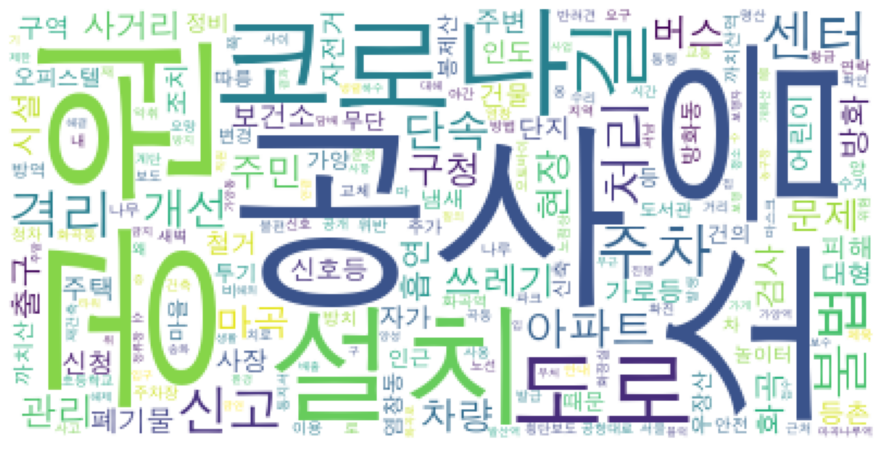

In [31]:
wordcloud = WordCloud(font_path='AppleGothic',
                      relative_scaling = 0.2, 
                      #stopwords=STOPWORDS,
                      background_color='white',
                      # mask=mask
                      ).generate_from_frequencies(dict(word_data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()